In [1]:
%%html
<marquee style='width:100%; color: blue;'><b> <h1 style="color:DeepSkyBlue;font-family:verdana;"> Housing Price Prediction (Regularization) </h1></b></marquee>


## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

## Business Goal
Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [31]:
#import EDA libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import ML libraries

from sklearn import linear_model, metrics, model_selection, preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

#hide warnings
import warnings
warnings.filterwarnings('ignore')



#### Loading and reading

In [3]:
#load and read dataset

housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#shape  of dataset

housing.shape

(1460, 81)

1460 entries with 81 features

In [5]:
#take a look at these datatypes

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

quite a few with missing values. Need to take a look

### Exploring Dataset

In [6]:
#checking for duplicates

# Checking for duplicate rows
housing[housing.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [7]:
#count of nulls
pd.set_option('display.max_rows', 100)
def null_dataframe(df):
    nulls = pd.DataFrame(df.isnull().mean().mul(100).sort_values(ascending=False), columns=['null_perc'])
    return nulls[nulls['null_perc']> 0]

null_dataframe(housing)

,null_perc
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


quite a few features with missing values but the data dictionary accounts for many of these

NaN means NA for ['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageCond','BsmtQual',
'BsmtFinType2','BsmtExposure','BsmtCond','BsmtFinType1']

NaN means None  for ['MasVnrType']

NaN mean 0 for ['MasVnrArea', 'GarageYrBlt']

assuming that all home electrical NaN means mode value for ['Electrical']

NaN means mean/median for LotFrontage - depends on skew of values. Additionally consideration for each neighbourhood should be made


#### Imputing missing values

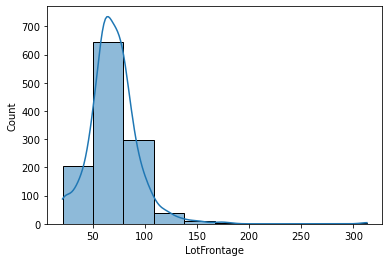

In [8]:
#checking LotFrontage

sns.histplot(housing['LotFrontage'], bins=10, kde=True)
plt.show()

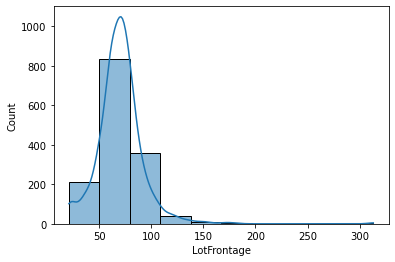

In [9]:
#data is skewed to the left so will fill NaN with median value by neighbourhood

housing['LotFrontage'] = housing.groupby('Neighborhood')['LotFrontage'].apply(lambda x : x.fillna(x.median()))
sns.histplot(housing['LotFrontage'], bins=10, kde=True)
plt.show()

In [10]:
#filling NaN in electrical
housing['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [11]:
housing['Electrical'].fillna('SBrkr', inplace=True)

In [13]:
#recheck nulls
null_dataframe(housing)

,null_perc
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
GarageFinish,5.547945
GarageType,5.547945
GarageYrBlt,5.547945
GarageQual,5.547945
GarageCond,5.547945


In [12]:
"""'MasVnrArea', 'GarageYrBuilt' should be 0 since NaN means area=0
for garageyrblt, we do not know the year and is NaN when no garage so a value of 0 will cancel term in regression 
when year not present"""
zero_nans = ['MasVnrArea', 'GarageYrBlt']

for i in zero_nans:
    housing[i].fillna(0, inplace=True)

In [13]:
#imputing for NA

na_nans = ['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageCond','BsmtQual',
           'BsmtFinType2','BsmtExposure','BsmtCond','BsmtFinType1']

for i in na_nans:
    housing[i].fillna('None - ' + i, inplace=True)

    
housing['PoolQC'].value_counts()

None - PoolQC    1453
Gd                  3
Ex                  2
Fa                  2
Name: PoolQC, dtype: int64

In [14]:
#recheck nulls
null_dataframe(housing)

,null_perc
GarageQual,5.547945
MasVnrType,0.547945


In [15]:
#forgot some, filling now

housing['GarageQual'].fillna('None - Garage', inplace=True)
housing['MasVnrType'].fillna('None', inplace=True)

#### Data Type Checks and Fixes

In [19]:
#some features are type int but really should be objects - using data dictionary for selection

int_to_obj = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath']

housing[int_to_obj] = housing[int_to_obj].astype('object')

#dropping Id
housing.drop(['Id'], axis=1, inplace=True)


In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [20]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,70.199658,22.431902,21.0,60.00,70.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0


In [21]:
#lists of num and cat variables

num_vars = list(housing.describe().T.index)

#list of categorical variables
cat_vars = [i for i in housing.columns if i not in num_vars]


print('number of numeric variables ', len(num_vars))
print('number of categorical variables ', len(cat_vars))

number of numeric variables  31
number of categorical variables  49


### Conducting more exploration of data

In [40]:
#functions for plotting numeric and categorical variables

#plotting numeric variables

def numeric_graphs(df, num_vars, y_value):
    for col in num_vars:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8,8)})

        f, (ax_reg, ax_hist) = plt.subplots(2, sharex=True)
        plt.gca().set(xlabel=col, ylabel='frequency')
        sns.regplot(x = df[col], y=df[y_value], ax=ax_reg)
        stp = stats.pearsonr(df[col], df[y_value])
        str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
        sns.histplot(df[col], ax=ax_hist, bins=10, kde=True)
        ax_reg.set_title(str_title, fontsize=11)
        plt.show()

        
#boxplots for categorical vs response
def cat_boxplots(df, cat_vars, y_value):
    for col in cat_vars:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8,5)})
        
        plt.gca().set(xlabel=col, ylabel=y_value)
        sns.boxplot(x = df[col], y=response, linewidth=1.0,orient='v')
        plt.show()


#### visualising numeric variables

<Figure size 576x360 with 0 Axes>

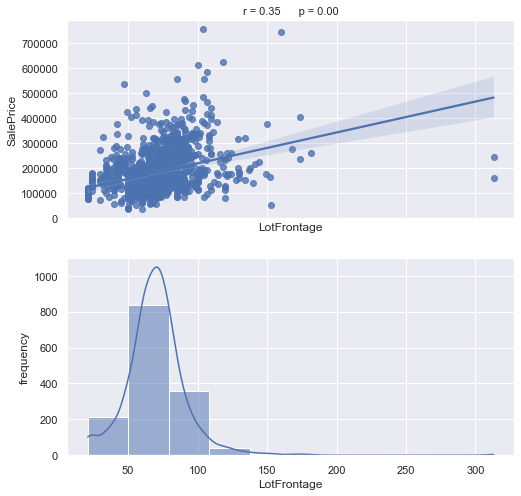

<Figure size 576x576 with 0 Axes>

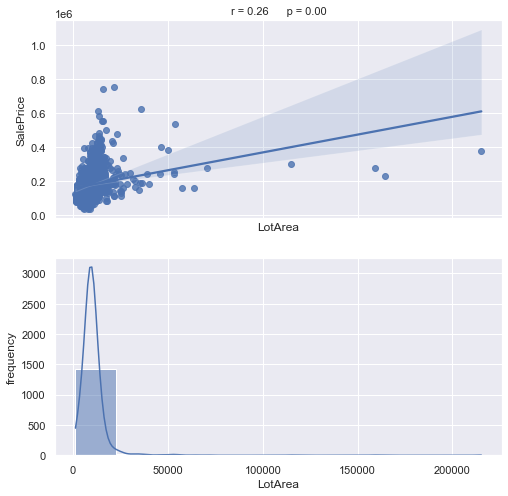

<Figure size 576x576 with 0 Axes>

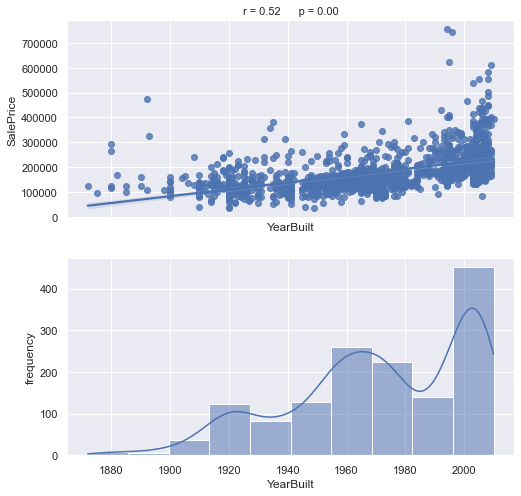

<Figure size 576x576 with 0 Axes>

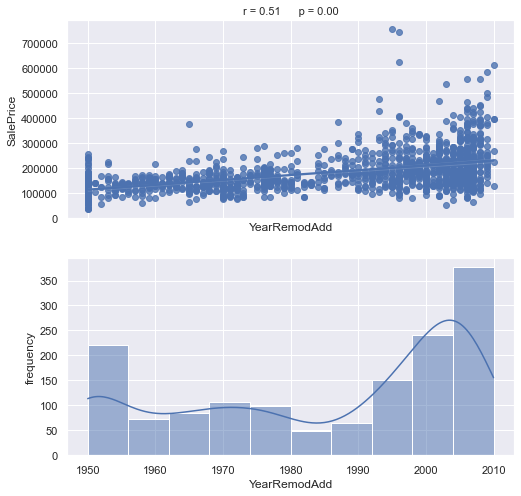

<Figure size 576x576 with 0 Axes>

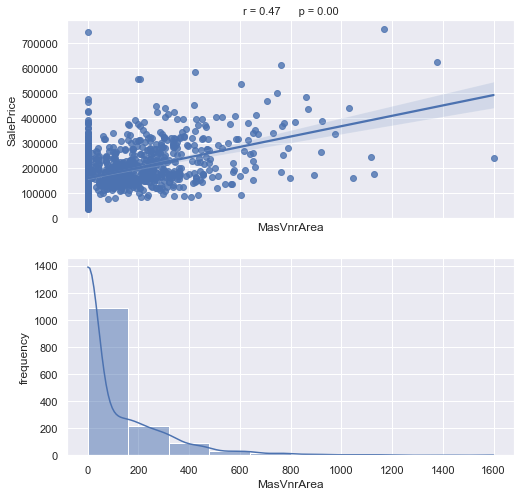

<Figure size 576x576 with 0 Axes>

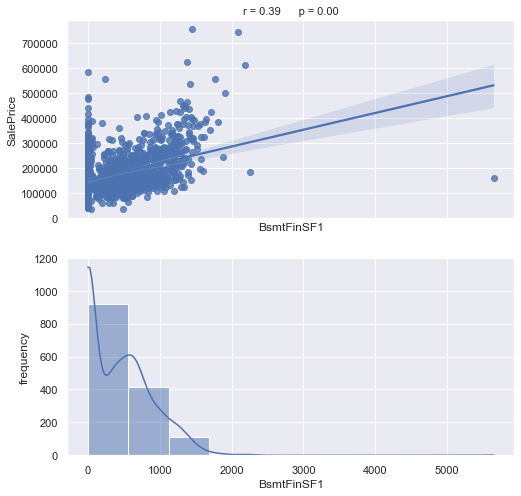

<Figure size 576x576 with 0 Axes>

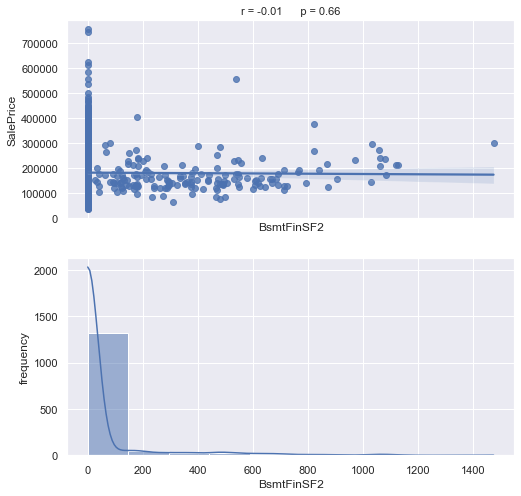

<Figure size 576x576 with 0 Axes>

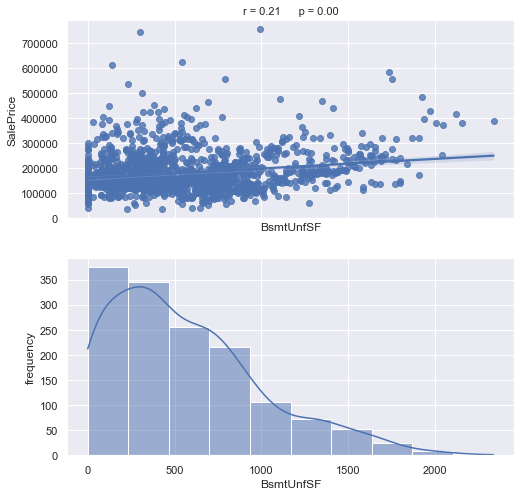

<Figure size 576x576 with 0 Axes>

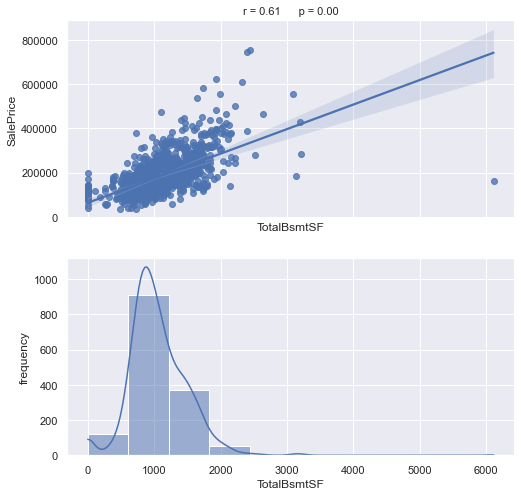

<Figure size 576x576 with 0 Axes>

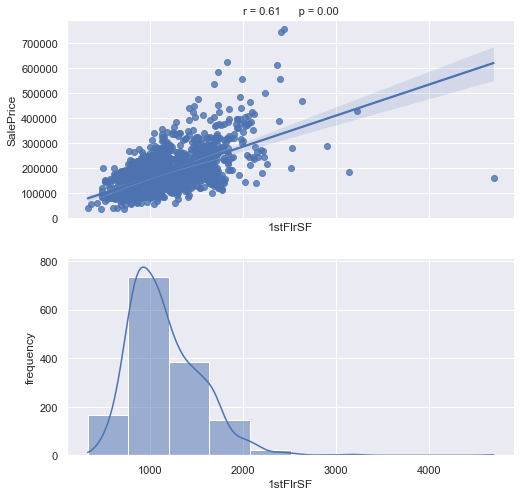

<Figure size 576x576 with 0 Axes>

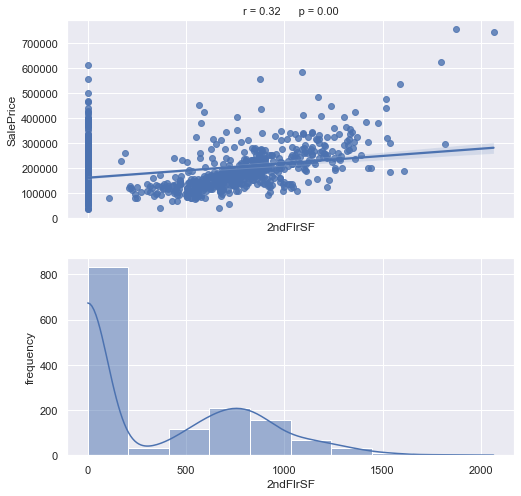

<Figure size 576x576 with 0 Axes>

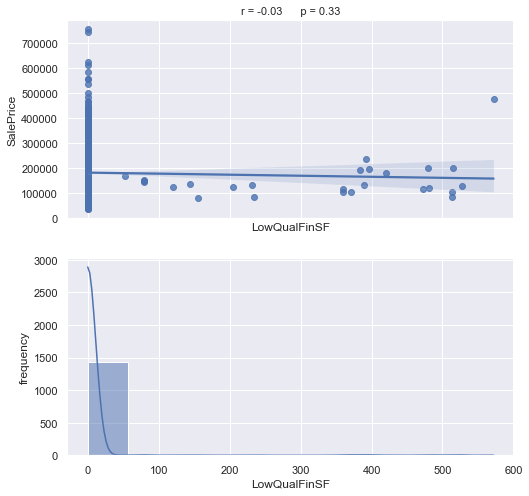

<Figure size 576x576 with 0 Axes>

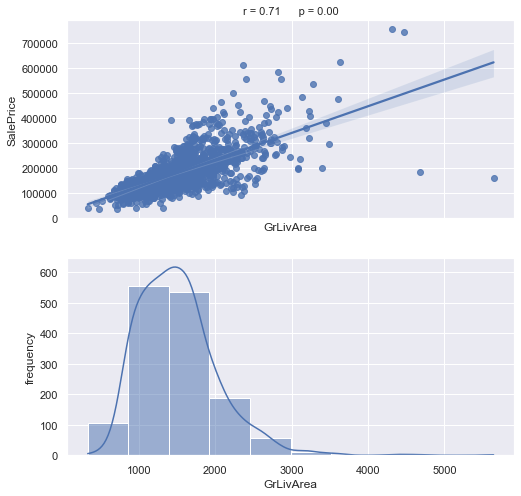

<Figure size 576x576 with 0 Axes>

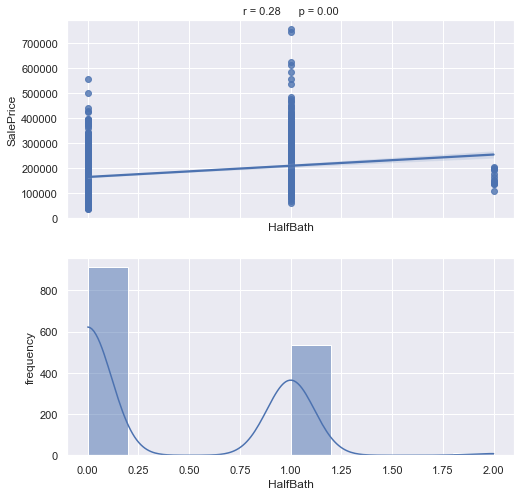

<Figure size 576x576 with 0 Axes>

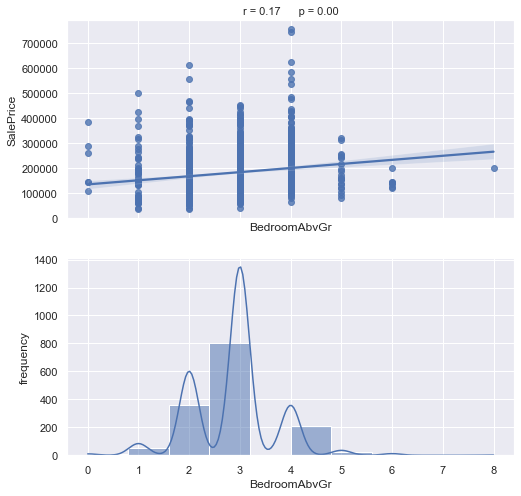

<Figure size 576x576 with 0 Axes>

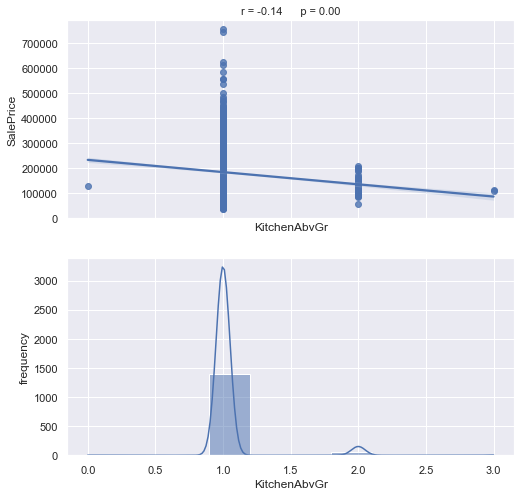

<Figure size 576x576 with 0 Axes>

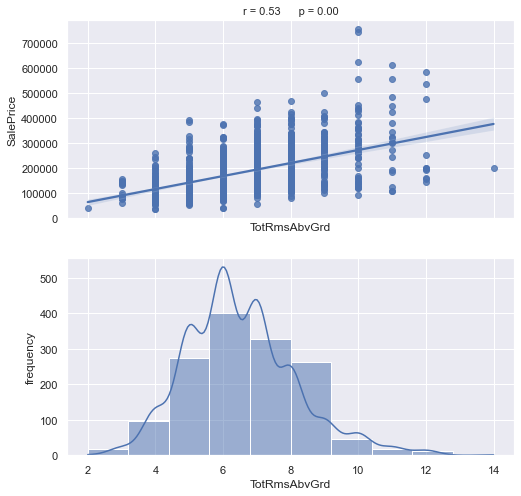

<Figure size 576x576 with 0 Axes>

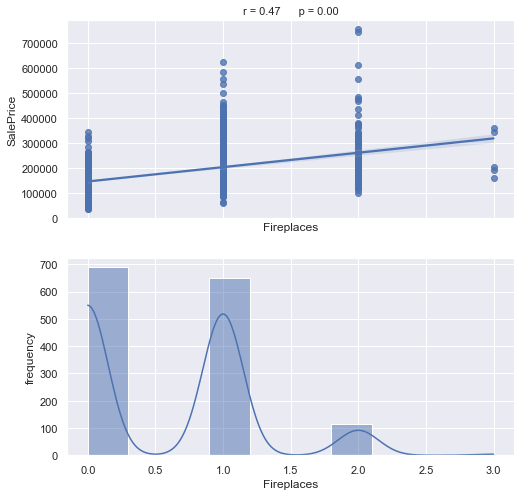

<Figure size 576x576 with 0 Axes>

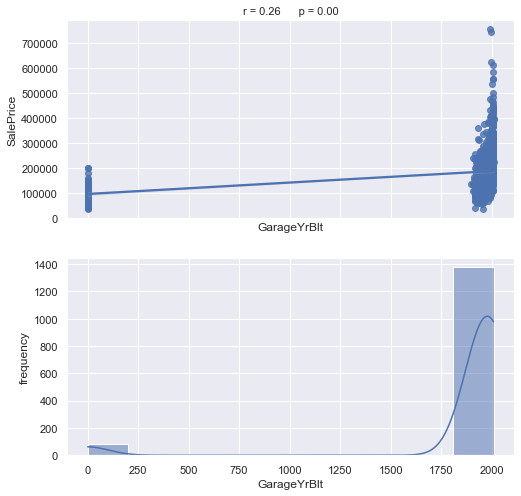

<Figure size 576x576 with 0 Axes>

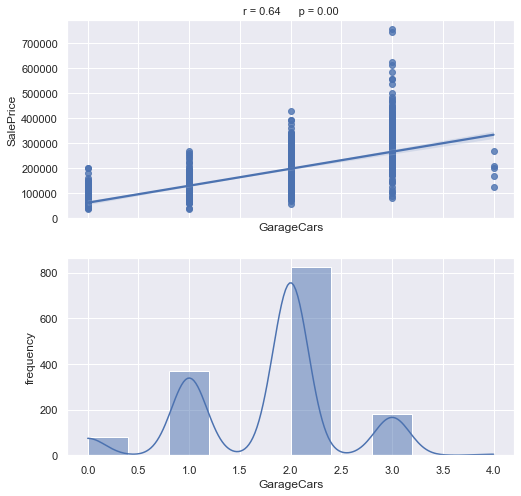

<Figure size 576x576 with 0 Axes>

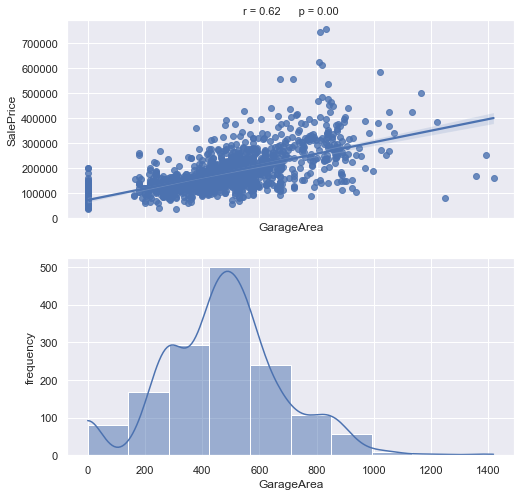

<Figure size 576x576 with 0 Axes>

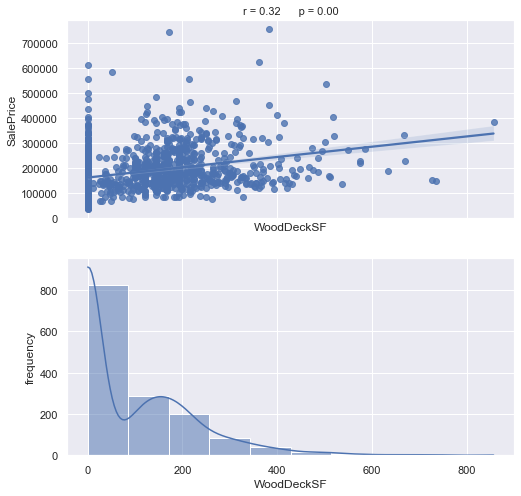

<Figure size 576x576 with 0 Axes>

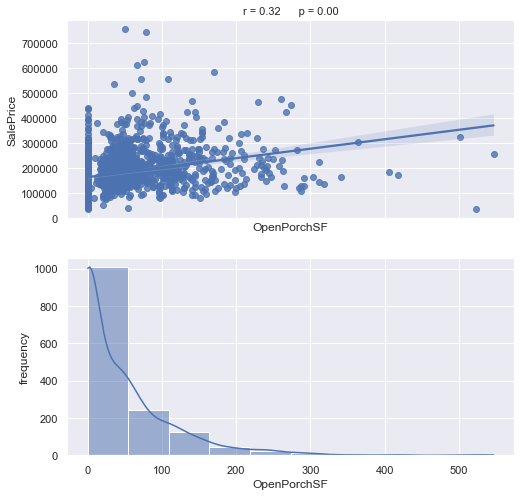

<Figure size 576x576 with 0 Axes>

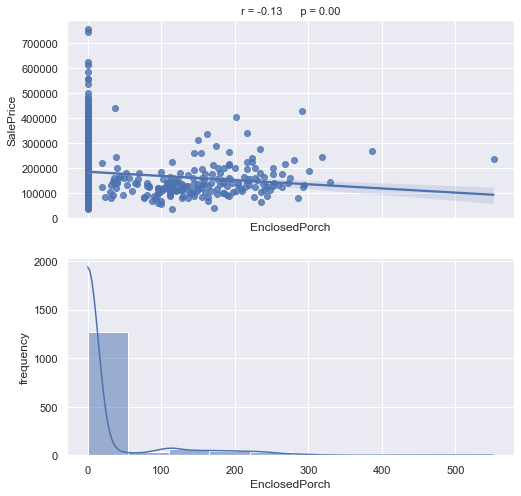

<Figure size 576x576 with 0 Axes>

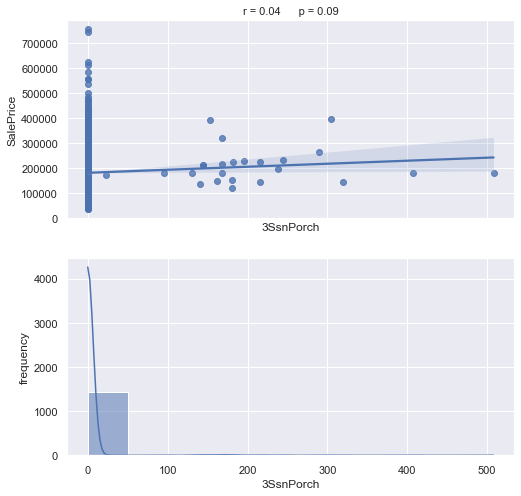

<Figure size 576x576 with 0 Axes>

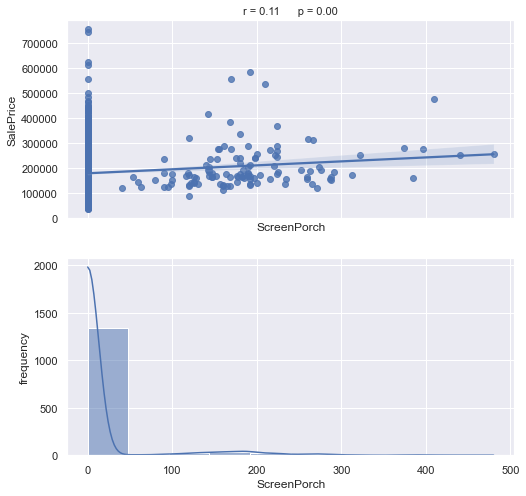

<Figure size 576x576 with 0 Axes>

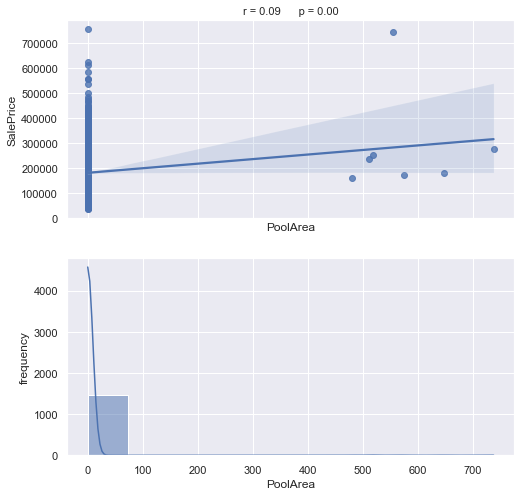

<Figure size 576x576 with 0 Axes>

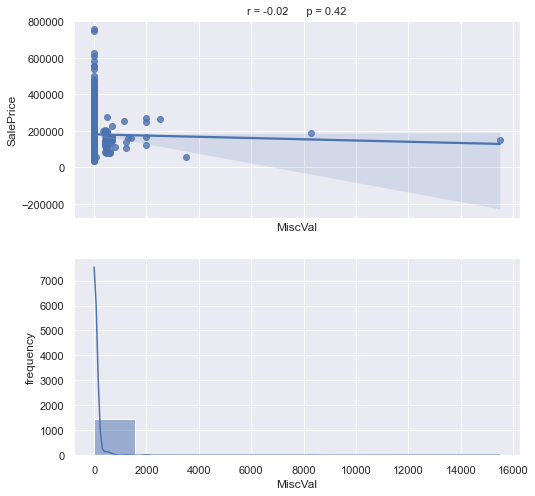

<Figure size 576x576 with 0 Axes>

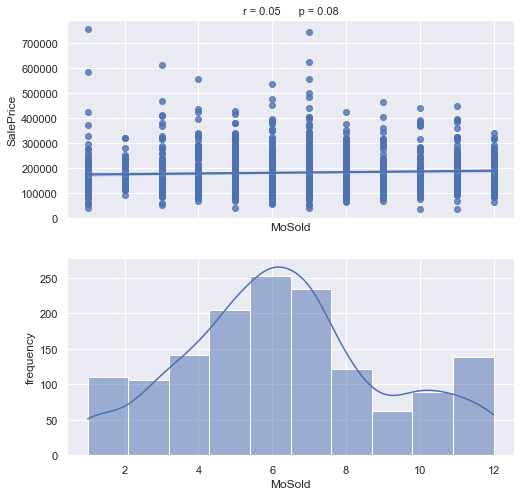

<Figure size 576x576 with 0 Axes>

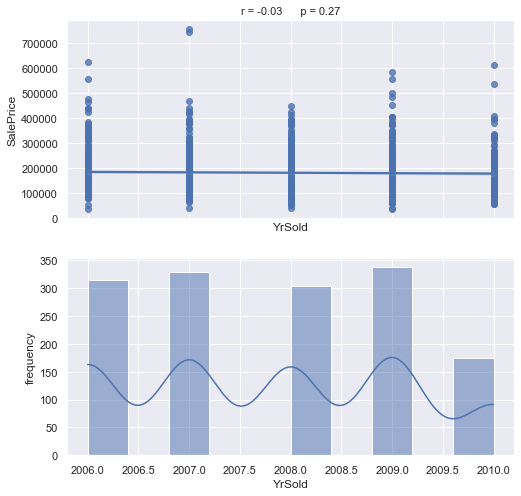

<Figure size 576x576 with 0 Axes>

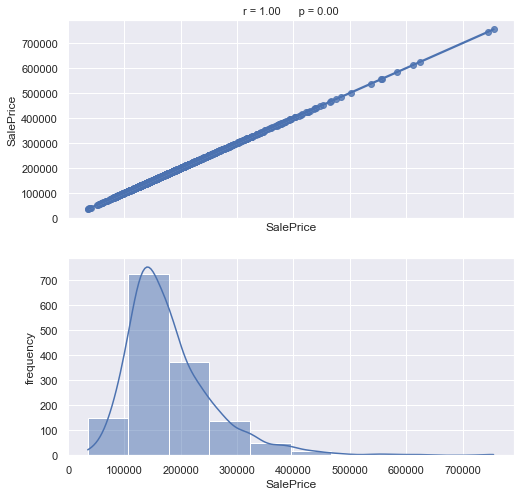

In [41]:
numeric_graphs(housing, num_vars, 'SalePrice')